# Imports

In [30]:
## Suppress warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import pickle

## Notebook display settings
from IPython.display import display
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.max_seq_items = None

# Own scripts
from functions import get_start_end_points, generate_histogram2d, gen_spirals, analyse_spiral
## Plot style
%matplotlib inline

# Daten

In [31]:
with open('data.pickle', 'rb') as handle:
    data = pickle.load(handle)
data.head()

,id,run,timestamp,segment,start_time,end_time,force_x,force_y,force_z,pos_x,pos_y,pos_z,rot_x,rot_y,rot_z,result_robot
0,163.0,0.0,2017-05-30 09:21:13.150,11.0,2017-05-30 09:21:05,2017-05-30 09:22:41.607,-0.543045,-2.924596,-7.257000,-257.695704,-265.980105,240.007357,-0.008832,0.034723,179.958414,Success
1,164.0,0.0,2017-05-30 09:21:13.200,11.0,2017-05-30 09:21:05,2017-05-30 09:22:41.607,-0.465969,-3.278856,-7.522000,-257.617629,-265.999590,240.004745,-0.000171,0.019928,179.968161,Success
2,165.0,0.0,2017-05-30 09:21:13.250,11.0,2017-05-30 09:21:05,2017-05-30 09:22:41.607,-0.317475,-3.435834,-7.705999,-256.626803,-266.602650,239.791224,-179.993978,179.989304,0.164766,Success
3,166.0,0.0,2017-05-30 09:21:13.300,11.0,2017-05-30 09:21:05,2017-05-30 09:22:41.607,-0.298383,-3.457754,-7.580999,-254.594017,-267.926090,239.323013,-179.992478,179.999036,0.577883,Success
4,167.0,0.0,2017-05-30 09:21:13.350,11.0,2017-05-30 09:21:05,2017-05-30 09:22:41.607,-0.289898,-3.447854,-7.539000,-251.411919,-269.894497,238.550625,-179.996649,179.988091,1.210269,Success


# Code

## Listen

Start und Endpunkte der Such-Segmente finden

In [32]:
start_points, end_points, rel_end_points = get_start_end_points(data)

In [33]:
hist, xedge, yedge = generate_histogram2d(rel_end_points)

# Spiralen

In [34]:
spirals = gen_spirals(hist, xedge, yedge, 0.026, -0.057)

## Definitionen

Zur besseren Verständlichkeit soll folgendes gelten:

- Norden (N) und Osten (E) sind die jeweiligen positiven Richtungen der x oder y Achse
- Süden (S) und Westen (W) sind die jeweiligen negativen Richtungen der x oder y Achse
- Die x Achse wird horizontal dargestellt, die Werte werden von niedrig/negativ (links) nach hoch/positiv (rechts) aufgetragen
- Die y Achse wird vertikal dargestellt, die Werte werden von niedrig/negativ (unten) nach hoch/positiv (oben) aufgetragen

## Analysis

In [35]:
_ = analyse_spiral(spirals, hist)

direction.S turn.turn_left: 65450.0

direction.S turn.turn_right: 62728.0

direction.N turn.turn_left: 63078.0

direction.N turn.turn_right: 65852.0

direction.W turn.turn_left: 62564.0

direction.W turn.turn_right: 63102.0

direction.E turn.turn_left: 65512.0

direction.E turn.turn_right: 65546.0

Best result: 
direction.W turn.turn_left
62564.0
[[16 15 14 13 12]
 [17  4  3  2 11]
 [18  5  0  1 10]
 [19  6  7  8  9]
 [20 21 22 23 24]]


Mit der relativen Verschiebung des Startpunktes um ~(0.026, -0.057) erhalten wir eine Verbesserung des Scores zwischen den besten Spiralsuchen auf 62564 von 67376 und somit eine prozentuale Verbesserung von ~7%

# Spiralen ohne Outlier

In [36]:
new_rel_end_points = rel_end_points.loc[(rel_end_points["x"] < 0.2) & (rel_end_points["y"] < 0.2)]

<AxesSubplot:xlabel='x', ylabel='y'>

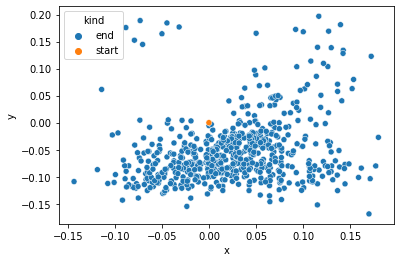

In [37]:
rel_plot_data = new_rel_end_points.copy()
rel_plot_data["kind"] = "end"
index = rel_plot_data.columns
rel_plot_data = rel_plot_data.append(pd.DataFrame([[0,0,0,"start"]], columns=index))
sns.scatterplot(data=rel_plot_data, x="x", y="y", hue="kind")

In [38]:
hist_no, xedge_no, yedge_no = generate_histogram2d(new_rel_end_points)

## Analyse mit unverändertem Startpunkt

In [39]:
spirals_no_o = gen_spirals(hist_no, xedge_no, yedge_no, 0, 0)

In [40]:
_ = analyse_spiral(spirals_no_o, hist_no)

direction.S turn.turn_left: 44207.0

direction.S turn.turn_right: 49619.0

direction.N turn.turn_left: 52035.0

direction.N turn.turn_right: 47455.0

direction.W turn.turn_left: 51321.0

direction.W turn.turn_right: 53993.0

direction.E turn.turn_left: 48229.0

direction.E turn.turn_right: 46013.0

Best result: 
direction.S turn.turn_left
44207.0
[[20 19 18 17 16]
 [21  6  5  4 15]
 [22  7  0  3 14]
 [23  8  1  2 13]
 [24  9 10 11 12]]


Für den Fall der entfernten Ausreiser haben wir einen neuen Referenzwert von 44207

## Analyse mit verändertem Startpunkt

In [41]:
spirals_no_c = gen_spirals(hist_no, xedge_no, yedge_no, 0.021, -0.057)

In [42]:
_ = analyse_spiral(spirals_no_c, hist_no)

direction.S turn.turn_left: 36489.0

direction.S turn.turn_right: 34881.0

direction.N turn.turn_left: 34949.0

direction.N turn.turn_right: 36549.0

direction.W turn.turn_left: 34331.0

direction.W turn.turn_right: 34527.0

direction.E turn.turn_left: 35823.0

direction.E turn.turn_right: 36139.0

Best result: 
direction.W turn.turn_left
34331.0
[[16 15 14 13 12]
 [17  4  3  2 11]
 [18  5  0  1 10]
 [19  6  7  8  9]
 [20 21 22 23 24]]


Mit der relativen Verschiebung des Startpunktes um ~(0.021, -0.057) auf dem veränderten Datensatz, erhalten wir eine Verbesserung des Scores zwischen den besten Spiralsuchen auf 34331 von 44207 und somit eine prozentuale Verbesserung von ~22% 

## Analyse mit verändertem Startpunkt aber kompletten Daten

In [45]:
spirals_2 = gen_spirals(hist, xedge, yedge, 0.021, -0.057)

In [46]:
_ = analyse_spiral(spirals_2, hist)

direction.S turn.turn_left: 65450.0

direction.S turn.turn_right: 62728.0

direction.N turn.turn_left: 63078.0

direction.N turn.turn_right: 65852.0

direction.W turn.turn_left: 62564.0

direction.W turn.turn_right: 63102.0

direction.E turn.turn_left: 65512.0

direction.E turn.turn_right: 65546.0

Best result: 
direction.W turn.turn_left
62564.0
[[16 15 14 13 12]
 [17  4  3  2 11]
 [18  5  0  1 10]
 [19  6  7  8  9]
 [20 21 22 23 24]]


Da die Verschiebungen von ~(0.026, -0.057) und ~(0.021, -0.057) nahezu gleich sind, ist keine Änderung des Ergebnisses zu erwarten ohne die Grenzen der Rasterisierung erheblich zu erhöhen.